# PTID-CDS-JAN22-1274

# PRCP-1007---Indian Liver Patient Dataset (ILPD)

This data set contains 416 liver patient records and 167 non liver patient records.The data
set was collected from north east of Andhra Pradesh, India. Selector is a class label used to 
divide into groups(liver patient or not). This data set contains 441 male patient records and 
142 female patient records.


# columns

1.Age of the patient 

2.Gender of the patient

3.Total Bilirubin

4.Direct Bilirubin

5.Alkaline Phosphotase

6.Alamine Aminotransferase

7.Aspartate Aminotransferase

8.Total Protiens

9.Albumin

10.Albumin and Globulin Ratio

11.Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib.colors import ListedColormap

In [2]:
#File does not contain headers so we need to load the headers manually
features=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset']
data= pd.read_csv("Indian Liver Patient Dataset (ILPD).csv", names=features)

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.shape

(583, 11)

In [5]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#  Exploratory Data Analysis


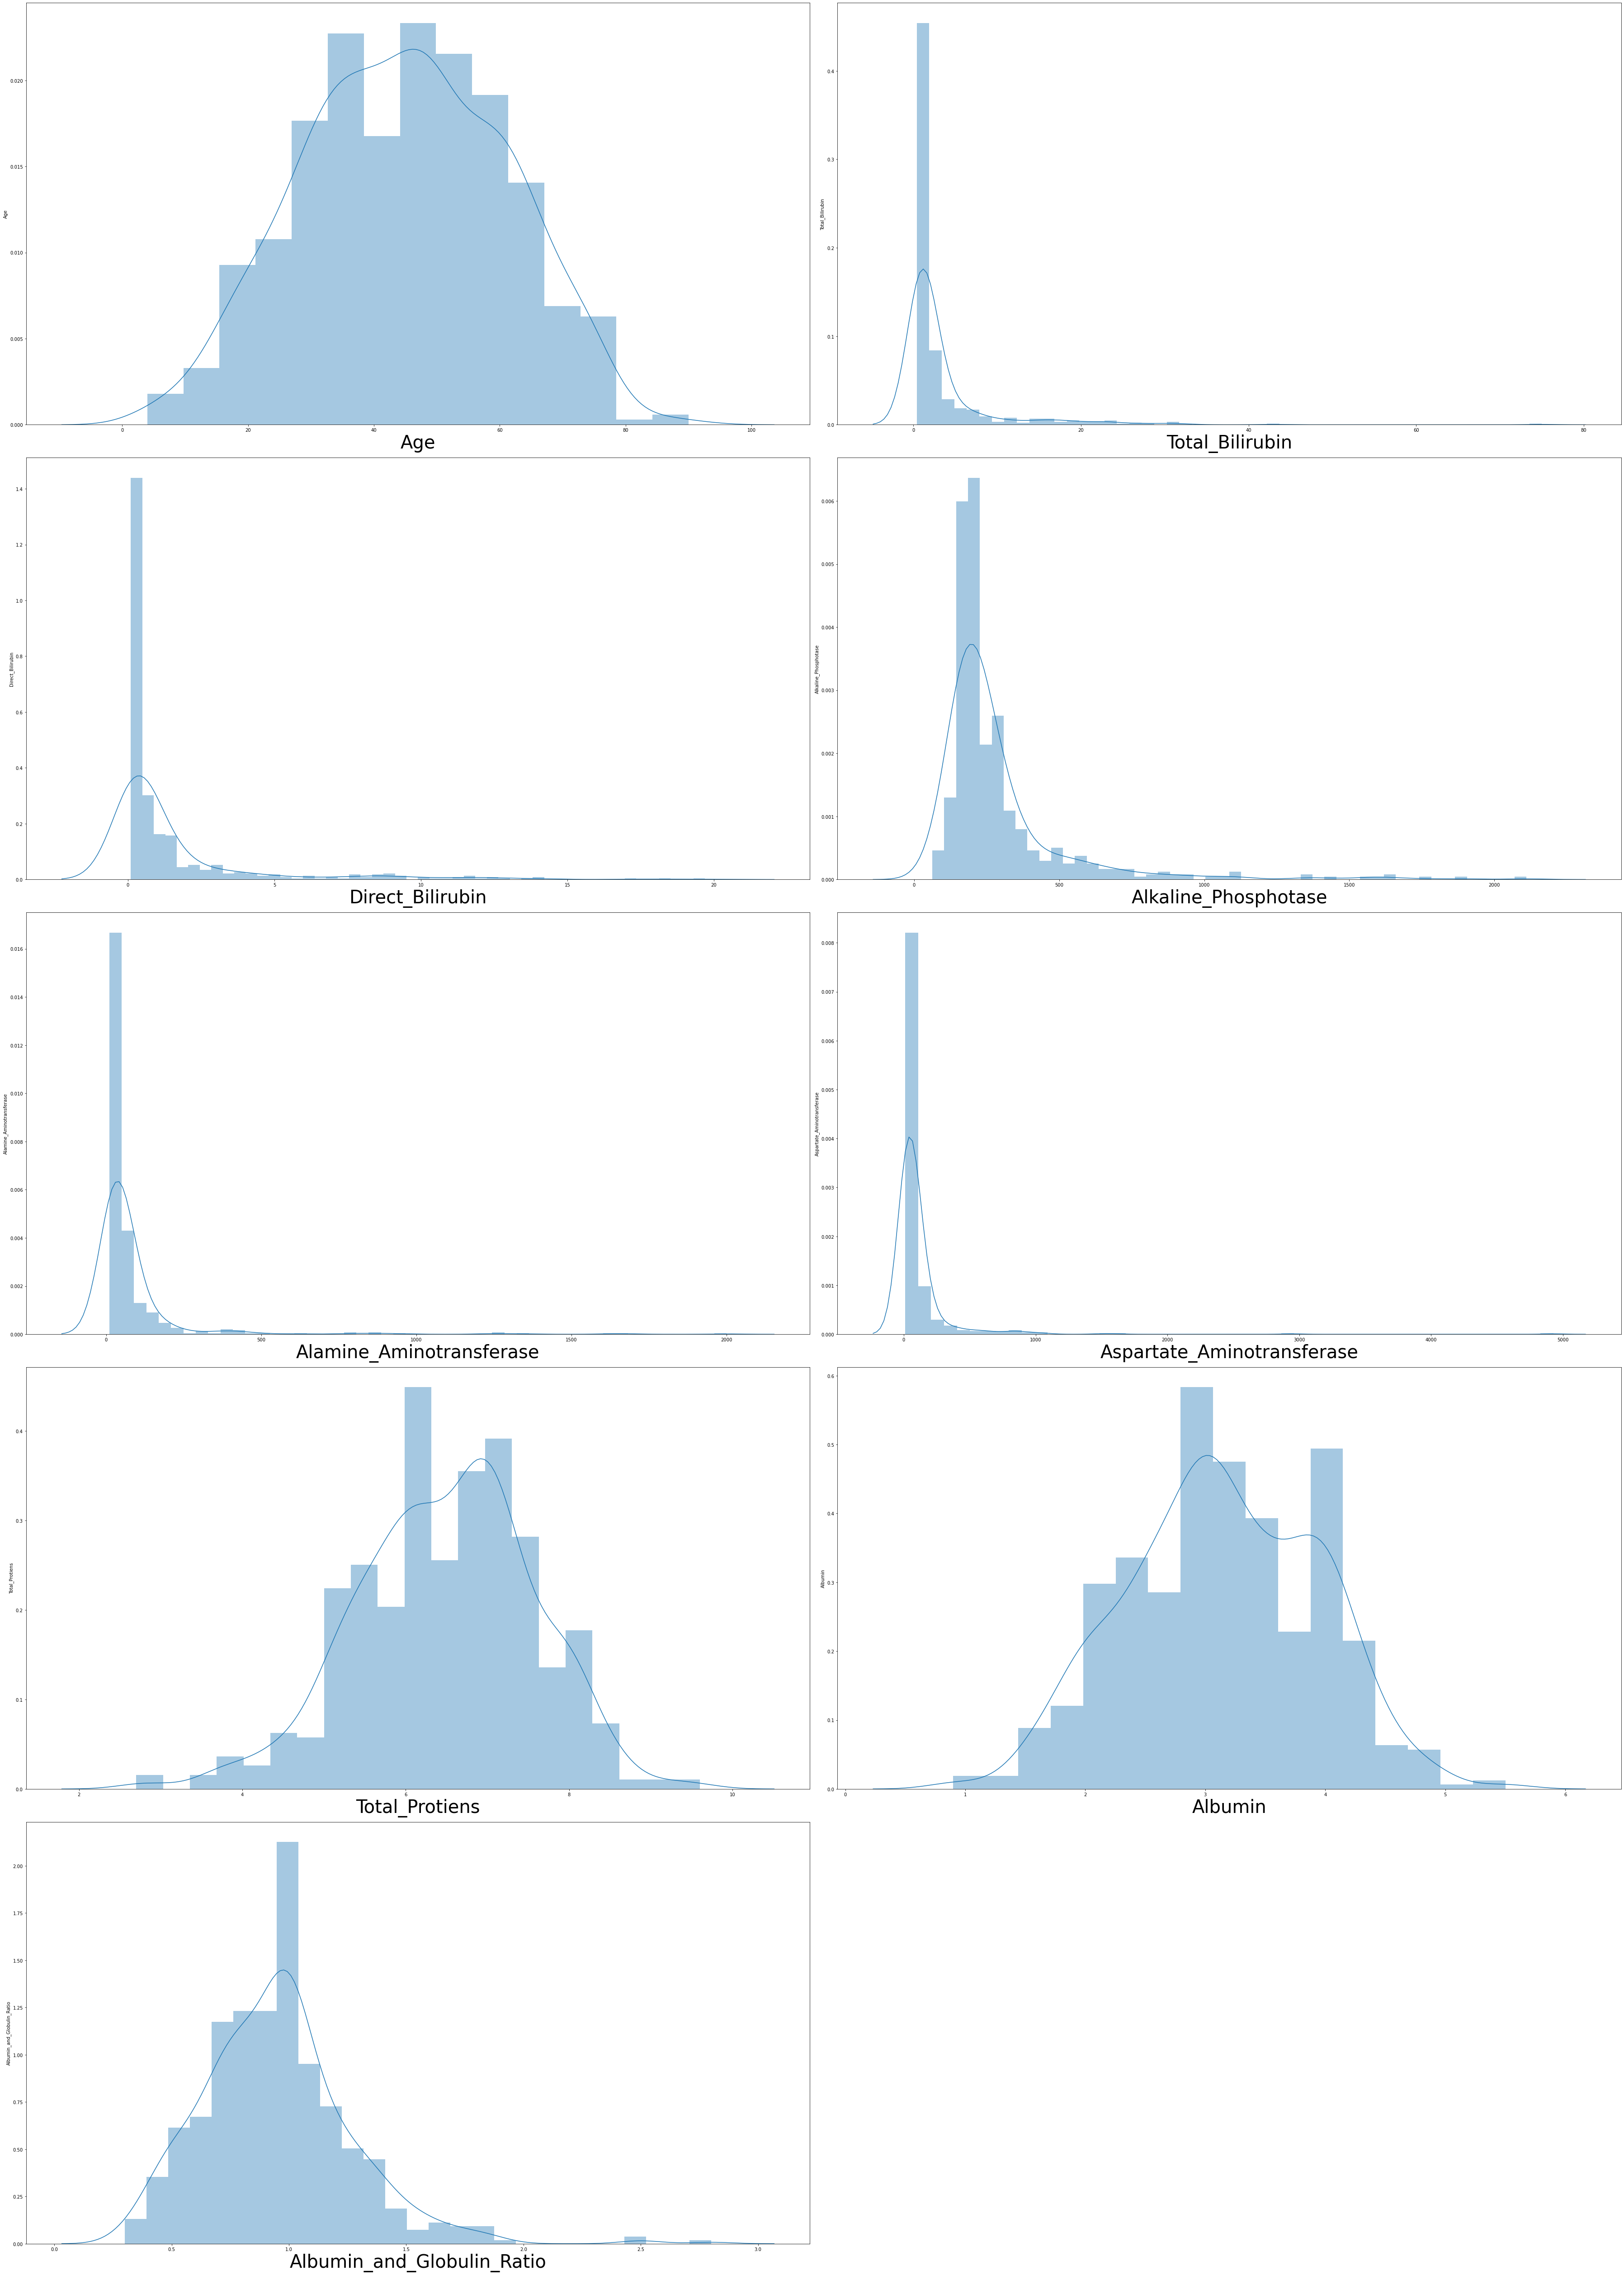

In [8]:
plt.figure(figsize=(50,70))
plot_number=1
for i in data.drop(['Dataset','Gender'],axis=1):
    if plot_number<=10:
        ax=plt.subplot(5,2,plot_number)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize='40')
        plt.ylabel(i)
        plot_number+=1
plt.tight_layout()
    

As we can see most of the data is normally distributed except few columns.

And some of the columns have skewness

# Data Preprocessing

# i. Handling the missing values

In [9]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
data['Albumin_and_Globulin_Ratio'].value_counts()

1.00    106
0.80     65
0.90     59
0.70     53
1.10     46
       ... 
0.88      1
1.02      1
1.09      1
0.89      1
1.36      1
Name: Albumin_and_Globulin_Ratio, Length: 69, dtype: int64

<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio'>

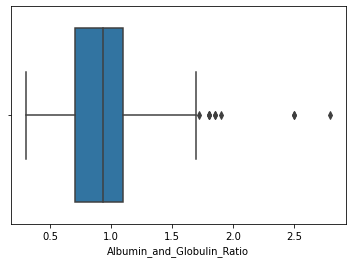

In [11]:
sns.boxplot(data=data, x= 'Albumin_and_Globulin_Ratio')

In [12]:
#as we can see the data is normally distributed but with some skewness its better to impute with median rather than mean
data['Albumin_and_Globulin_Ratio'].median()

0.93

In [13]:
data['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815201

In [14]:
data['Albumin_and_Globulin_Ratio']=data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median())

In [15]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

# ii.Converting categorical features to numerical

In [16]:
data['Gender']

0      Female
1        Male
2        Male
3        Male
4        Male
        ...  
578      Male
579      Male
580      Male
581      Male
582      Male
Name: Gender, Length: 583, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

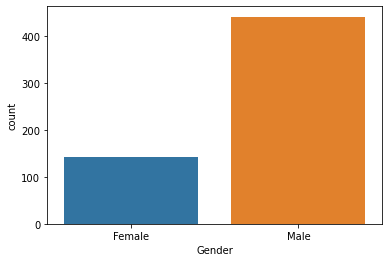

In [17]:
sns.countplot(data=data, x='Gender', label='count')

In [18]:
Male ,Female = data['Gender'].value_counts()
print('Number of patients that are male:',Male)
print('Number of patients that are female:',Female)

Number of patients that are male: 441
Number of patients that are female: 142


In [19]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})

In [20]:
data['Gender']

0      0
1      1
2      1
3      1
4      1
      ..
578    1
579    1
580    1
581    1
582    1
Name: Gender, Length: 583, dtype: int64

# iii. Check for Outliers

<AxesSubplot:>

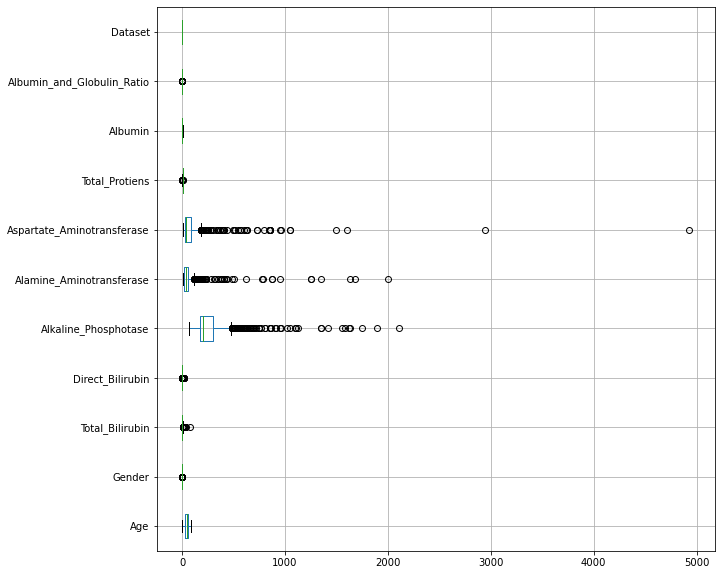

In [21]:

data.boxplot(figsize = (10,10), vert = False)

In [22]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

Age                            25.0
Gender                          0.0
Total_Bilirubin                 1.8
Direct_Bilirubin                1.1
Alkaline_Phosphotase          122.5
Alamine_Aminotransferase       37.5
Aspartate_Aminotransferase     62.0
Total_Protiens                  1.4
Albumin                         1.2
Albumin_and_Globulin_Ratio      0.4
Dataset                         1.0
dtype: float64

In [23]:
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()    # No. of outliers in each column

Age                             0
Gender                        142
Total_Bilirubin                84
Direct_Bilirubin               81
Alkaline_Phosphotase           69
Alamine_Aminotransferase       73
Aspartate_Aminotransferase     66
Total_Protiens                  8
Albumin                         0
Albumin_and_Globulin_Ratio     10
Dataset                         0
dtype: int64

# Correlation Matrix

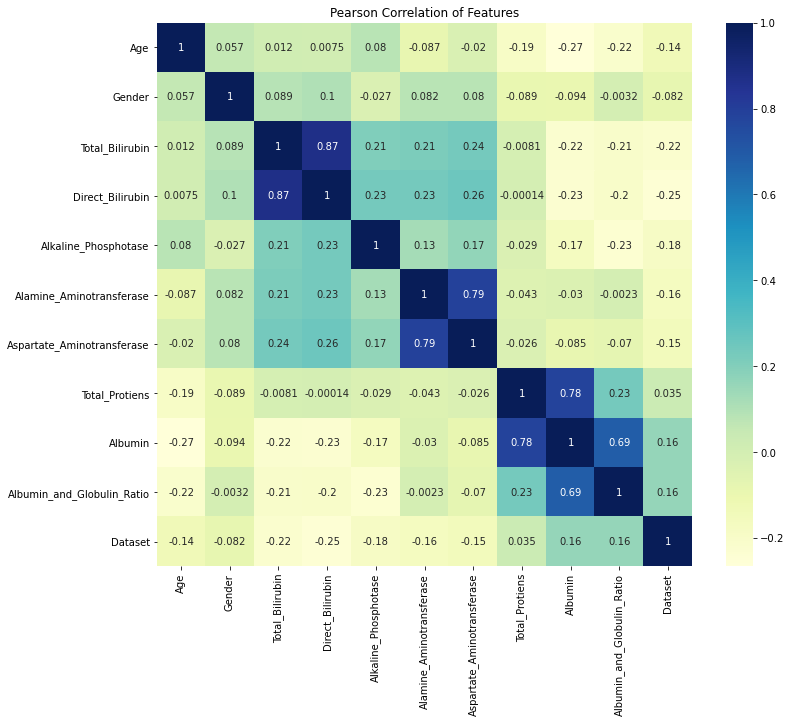

In [24]:
#Correlation using Heatmap:
plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.savefig('fig2')
plt.show()

There is Multi-Collinearity found on our dataset.

In [25]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

Multicollinearity between 'Total_Bilirubin' and 'Direct_Bilirubin' is 0.87%

Multicollinearity between 'Alamine_Aminotransferase' and 'Aspartate_Aminotransferase' is 0.79%

Multicollinearity between 'Total_Protiens' and 'Albumin' is 0.78%

Multicollinearity between 'Albumin' and 'Albumin_and_Globulin_Ratio' is 0.69%

Usually we drop that feature which has above 0.85% multicollinearity between two independent feature. Here we
have only 'Total_Bilirubin' and 'Direct_Bilirubin' feature which has 0.87% mutlicollinearity. So we drop one 
of the feature from them and other independent feature has less multicollinearity, less than 0.80% So we keep
that feature.

In [26]:
# Droping 'Direct_Bilirubin' feature:
data = data.drop('Direct_Bilirubin', axis=1)

In [27]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

# Data Preparation

Before balancing the data its better to take out the test data

In [28]:
#X = data.iloc[: , :-1].values
#y = data.iloc[:,-1].values

In [29]:
X=data.drop('Dataset',axis=1)
y=data['Dataset']

In [30]:
# top 5 records of Independent features:
X.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,187,16,18,6.8,3.3,0.90
1,62,1,10.9,699,64,100,7.5,3.2,0.74
2,62,1,7.3,490,60,68,7.0,3.3,0.89
3,58,1,1.0,182,14,20,6.8,3.4,1.00
4,72,1,3.9,195,27,59,7.3,2.4,0.40


In [31]:
# top 5 records of dependent features:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_t,X_test,y_t,y_test=train_test_split(X,y,test_size=0.25,random_state=19)

In [34]:
len(y_test)

146

# iv.Balancing the data

In [35]:
#!pip install imblearn 
from imblearn.over_sampling import SMOTE
from collections import Counter

In [36]:
smote=SMOTE()

In [37]:
X_sm,y_sm=smote.fit_resample(X_t,y_t)

In [38]:
print(Counter(y_t))
print(Counter(y_sm))

Counter({1: 309, 2: 128})
Counter({1: 309, 2: 309})


# v.Splitting the data

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_sm,y_sm,random_state=19)
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve

In [40]:
#lets create a function to train,predict and evaluate a model
def train_model(model,X_train,y_train,X_val,y_val):
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_preds=model.predict(X_val)
    print(f'training accuracy is: {accuracy_score(y_train,y_train_pred)}')
    print(f"val_accuracy_score is: {accuracy_score(y_val,y_preds)}")
    print(f"precision_score is: {precision_score(y_val,y_preds)}")
    print(f"recall_score is: {recall_score(y_val,y_preds)}")
    #return confusion_matrix(y_val,y_preds,labels=[0,1])

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [42]:
log_clf=LogisticRegression()
random_clf=RandomForestClassifier()
svc_clf=SVC()
DT_clf=DecisionTreeClassifier()
xgb_clf=XGBClassifier(learning_rate=0.0001,n_estimators=4522,random_state=19)

In [43]:
train_model(log_clf,X_train,y_train,X_val,y_val)

training accuracy is: 0.7732181425485961
val_accuracy_score is: 0.6387096774193548
precision_score is: 0.6935483870967742
recall_score is: 0.5375


In [44]:
train_model(svc_clf,X_train,y_train,X_val,y_val)

training accuracy is: 0.7796976241900648
val_accuracy_score is: 0.6709677419354839
precision_score is: 0.7636363636363637
recall_score is: 0.525


In [45]:
train_model(DT_clf,X_train,y_train,X_val,y_val)

training accuracy is: 1.0
val_accuracy_score is: 0.7161290322580646
precision_score is: 0.78125
recall_score is: 0.625


In [46]:
train_model(random_clf,X_train,y_train,X_val,y_val)

training accuracy is: 1.0
val_accuracy_score is: 0.7096774193548387
precision_score is: 0.7611940298507462
recall_score is: 0.6375


In [47]:
train_model(xgb_clf,X_train,y_train,X_val,y_val)

training accuracy is: 0.8682505399568035
val_accuracy_score is: 0.7096774193548387
precision_score is: 0.7692307692307693
recall_score is: 0.625


In [48]:
#Cross validating the model
from sklearn.model_selection import cross_val_score
cross_val_score(random_clf,X_train,y_train,cv=5)

array([0.78494624, 0.74193548, 0.70967742, 0.80434783, 0.80434783])

# Hyperparameter Tuning

In [49]:
from sklearn.model_selection import RandomizedSearchCV
random_clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]  
max_features = ['log2', 'sqrt']                                 
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4,8,10]
bootstrap = [True, False] 
#dictionary for hyperparameters
params = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [51]:
rcv= RandomizedSearchCV(random_clf, scoring='recall',param_distributions=params,cv=3,
                                n_jobs=-1,verbose=3,n_iter=100,random_state=19)

In [52]:
rcv.fit(X_sm,y_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=19, scoring='recall', verbose=3)

In [53]:
rcv.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 70,
 'bootstrap': False}

In [54]:
random_clf2=RandomForestClassifier(n_estimators=2688,
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   max_features='sqrt',
                                   max_depth=130,
                                   bootstrap=False,
                                   random_state=19)

In [55]:
random_clf2.fit(X_sm,y_sm)

RandomForestClassifier(bootstrap=False, max_depth=130, max_features='sqrt',
                       n_estimators=2688, random_state=19)

In [56]:
y_test_pred=random_clf2.predict(X_test)

In [57]:
accuracy_score(y_test,y_test_pred)

0.7671232876712328

In [59]:
precision_score(y_test,y_test_pred)

0.8348623853211009

In [60]:
confusion_matrix(y_test,y_test_pred)

array([[91, 16],
       [18, 21]], dtype=int64)

In [61]:
recall_score(y_test,y_test_pred)

0.8504672897196262

In [64]:
confusion_matrix(y_test,y_test_pred)

array([[91, 16],
       [18, 21]], dtype=int64)

In [69]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.83      0.85      0.84       107
           2       0.57      0.54      0.55        39

    accuracy                           0.77       146
   macro avg       0.70      0.69      0.70       146
weighted avg       0.76      0.77      0.77       146



### Conclusion

Best suited algorithm for this dataset is RandomForest (SMOTE,Hyperparameter tuning) with 76.7% accuracy and precision score of 83.4%.



In [ ]:
0